<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/R3_Gene_set_enrichment_analysis_MEF_vs_MEF_DOX_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook looks at 4 genesets used for gene set enrichment analysis Day0 vs Day 1

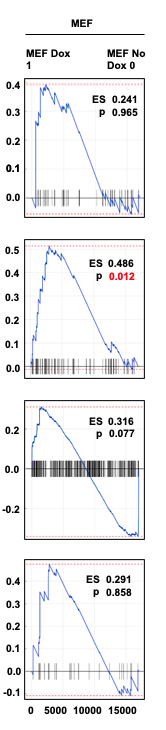

In [ ]:
start_time0 <- Sys.time()

### Install R packages
A large fraction of the running time of this notebook is in installing the Seurat R package, since it has lots of dependencies and many of them use Rcpp which results in the need to compile lots of C++ code.

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'SummarizedExperiment', 'rhdf5', 'SingleCellExperiment', 'limma', 'goseq', 
  'stringr', 'ggplot2', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'wordcloud', 'plotrix', 'DESeq2','fgsea','cowplot'
), Ncpus = 2)
install.packages(c('farver', "Seurat"), Ncpus = 2)
install.packages('devtools')
devtools::install_github('rstudio/reticulate')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'stringr' 'ggplot2'”
Installing package(s) 'BiocVersion', 'SummarizedExperiment', 'rhdf5',
  'SingleCellExperiment', 'limma', 'goseq',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'wordcloud', 'plotrix',
  'DESeq2', 'fgsea', 'cowplot'

also installing the dependencies ‘Rhtslib’, ‘rjson’, ‘filelock’, ‘formatR’, ‘zlibbioc’, ‘bitops’, ‘XML’, ‘Rsamtools’, ‘GenomicAlignments’, ‘restfulr’, ‘plogr’, ‘png’, ‘BiocFileCache’, ‘lambda.r’, ‘futile.options’, ‘xtable’, ‘matrixStats’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘rtracklayer’, ‘RSQLite’, ‘KEGGREST’, ‘Biostri


✔  checking for file ‘/tmp/RtmprQVq5L/remotes546c108cbf/rstudio-reticulate-d98c60e/DESCRIPTION’
─  preparing ‘reticulate’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘reticulate_1.22-9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(SummarizedExperiment)
library(RColorBrewer)
library(plyr)
library(dplyr)
library(parallel)
library(ggplot2)
library(goseq)
library(stringr)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(wordcloud)
library(plotrix)
library(DESeq2)
library(fgsea)
library(cowplot)
library(SingleCellExperiment)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

In [ ]:
library(tidyverse)
library(magrittr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.4     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   2.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()        masks plyr::arrange()
✖ dplyr::collapse()       masks IRanges::collapse()
✖ dplyr::combine()        masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()        masks plyr::compact()
✖ dplyr::count()          masks plyr::count(), matrixStats::count()
✖ dplyr::desc()           masks plyr::desc(), IRanges::desc()
✖ tidyr::expand()         masks S4Vectors::expand()
✖ dplyr::failwith()       masks plyr::failwith()
✖ dplyr::filter()         masks stats::filter()
✖ dplyr::first()          masks S4Vectors::first()
✖ dplyr::id()             masks plyr::id()
✖ dplyr::lag()            masks stats::lag()

In [ ]:
BiocManager::install(c(
  'fgsea','cowplot'
))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'fgsea' 'cowplot'”
Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'mime', 'openssl', 'pillar', 'rcmdcheck', 'readr',
  'remotes', 'stringi', 'testthat', 'tibble', 'tidyr', 'tinytex', 'nlme'



In [ ]:
BiocManager::install(c(
  "GO.db"
))
library(GO.db)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GO.db'”
Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'mime', 'openssl', 'pillar', 'rcmdcheck', 'readr',
  'remotes', 'stringi', 'testthat', 'tibble', 'tidyr', 'tinytex', 'nlme'



In [ ]:
BiocManager::install(c(
  "GOfuncR"
))
library(GOfuncR)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'GOfuncR'

also installing the dependencies ‘sm’, ‘vioplot’, ‘mapplots’


Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'mime', 'openssl', 'pillar', 'rcmdcheck', 'readr',
  'remotes', 'stringi', 'testthat', 'tibble', 'tidyr', 'tinytex', 'nlme'

Loading required package: vioplot

Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Mus.musculus")
library(Mus.musculus)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'Mus.musculus'

also installing the dependencies ‘graph’, ‘RBGL’, ‘OrganismDbi’


Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'mime', 'openssl', 'pillar', 'rcmdcheck', 'readr',
  'remotes', 'stringi', 'testthat', 'tibble', 'tidyr', 'tinytex', 'nlme'

Loading required package: OrganismDbi



## Load processed scRNA-seq data

In [ ]:
se_file <- c(
  "se" = "https://s3.msi.umn.edu/gongx030/etv2_pioneer/data/processed_Etv2_scRNAseq.rds")

In [ ]:
for (i in 1:length(se_file)){
  sprintf('wget -x -c -nH %s', se_file[i]) %>% system()
}
se_file <- gsub('https://s3.msi.umn.edu/', './', se_file)
message(sprintf('all se_file exist: %s', all(file.exists(se_file))))

all se_file exist: TRUE



In [ ]:
se <- lapply(se_file, function(s){s %>%
  readRDS()})

In [ ]:
se <- se$se


## Determine the number of clusters by running k-means on the scVI latent space

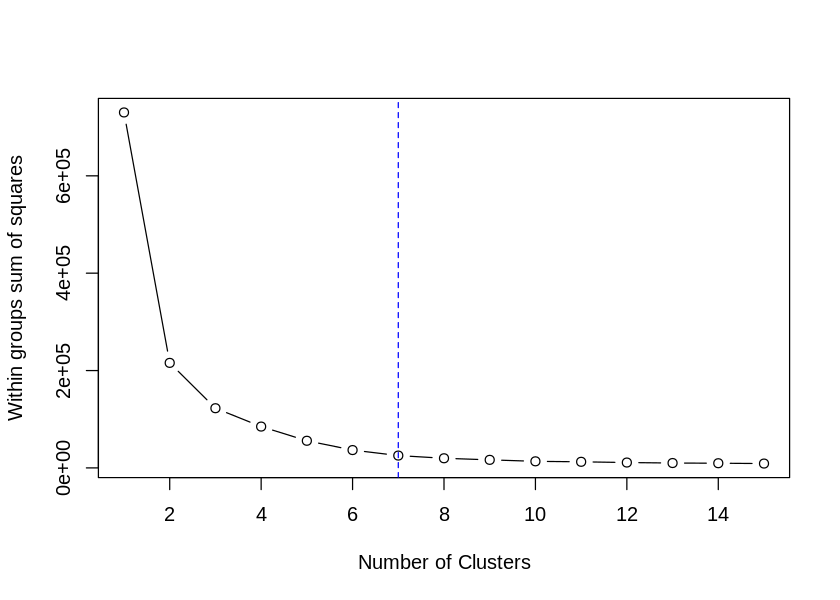

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)
wss <- (nrow(colData(se)$umap)-1) * sum(apply(colData(se)$umap, 2, var))
for (i in 2:15) wss[i] <- sum(kmeans(colData(se)$umap,centers = i, nstart = 10)$withinss)
options(repr.plot.width=7, repr.plot.height=5)
plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")
n_cluster <- 7
abline(v = n_cluster, col = 'blue', lty = 2)

In [ ]:
set.seed(1)
# it is important to set nstart to a large number to get a relatively robust clustering result. 
cls <- kmeans(colData(se)$umap, n_cluster, nstart = 100)$cluster
table(cls, colData(se)$group)
cls <- as.numeric(factor(cls, c(4, 5, 2, 3, 1, 7, 6)))
table(cls, colData(se)$group)

   
cls MEF_NoDox MEF_Dox_D1 MEF_Dox_D2 MEF_Dox_D7a MEF_Dox_D7b
  1         1          0         17        1493           3
  2         0          6       1443           1           0
  3         0          4       1435          23           0
  4      2878        541         21           2           3
  5       657        381          1           0           0
  6         0          2          0           1         813
  7        26         14         19        5682           8

   
cls MEF_NoDox MEF_Dox_D1 MEF_Dox_D2 MEF_Dox_D7a MEF_Dox_D7b
  1      2878        541         21           2           3
  2       657        381          1           0           0
  3         0          6       1443           1           0
  4         0          4       1435          23           0
  5         1          0         17        1493           3
  6        26         14         19        5682           8
  7         0          2          0           1         813

#Gene sets

In [ ]:
gene_list <- c(
  "nfkb" = "https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/Nf_kB.tsv",
  "hdac" = "https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/HDAC_complex.tsv",
  "hat" = "https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/Hat.tsv",
  "inflammatory" = "https://s3.msi.umn.edu/dsouz072/datasets/dataset=etv2_pioneer=20210404a/Inflammatory_go.tsv")

In [ ]:
for (i in 1:length(gene_list)){
  sprintf('wget -x -c -nH %s', gene_list[i]) %>% system()
}
gene_list <- gsub('https://s3.msi.umn.edu/', './', gene_list)
message(sprintf('all gene_list exist: %s', all(file.exists(gene_list))))

all gene_list exist: TRUE



In [ ]:
genes <- lapply(gene_list, function(g){read.table(g, header = TRUE, sep = '\t')})

In [ ]:
genes[["hdac_sub"]] <- genes[["hdac"]][grepl('histone', genes[["hdac"]]$GO.NAME),] #Subsetting Histone Deactylase complex

In [ ]:
gene_sets <- lapply(genes, function(x){x$SYMBOL})
names(gene_sets) <- names(genes)

# MEF D1 vs MEF ND

In [ ]:
X <- assays(se)$scaled_counts
control <- colData(se)$group == 'MEF_NoDox'
treatment <- colData(se)$group == 'MEF_Dox_D1'
fc_ct <- rowMeans(X[, treatment]) - rowMeans(X[, control])
names(fc_ct) <- rowData(se)$name

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)



Fold change arranged in descending order

In [ ]:
fc_ct <- na.omit(fc_ct)
fc_ct <- sort(fc_ct, decreasing = TRUE)

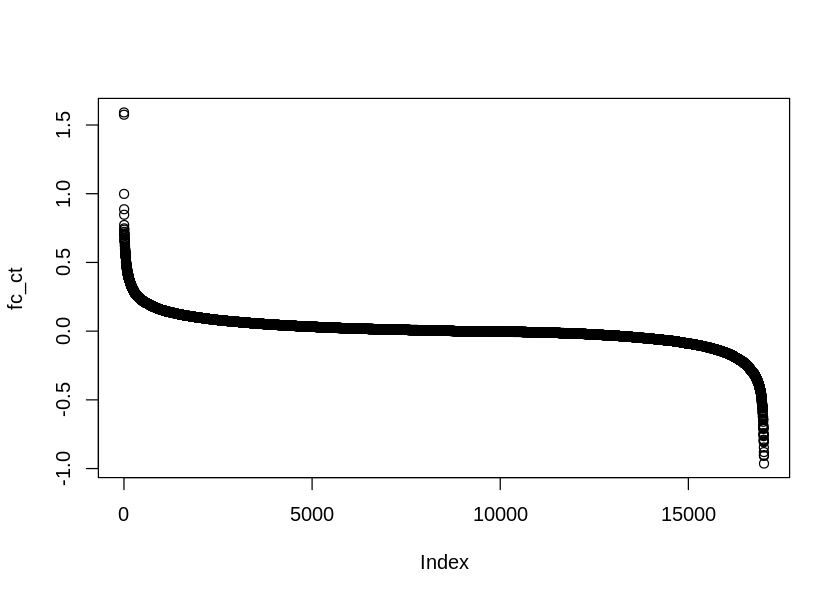

In [ ]:
plot(fc_ct)

#Gene Set Enrichment Analysis

In [ ]:
set.seed(5)
fgseaRes <-  fgseaMultilevel(pathways = gene_sets, 
                  stats    = fc_ct,
                  minSize  = 1,
                  maxSize  = 2000,
                  nPermSimple = 50000)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”


In [ ]:
fgseaRes

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
hat,0.96548858,0.96548858,0.006610165,0.2412059,0.6613934,39,"Kat2a , Taf9 , Naa60 , Kat2b , Gtf2b , Med24 , Supt7l, Kat14 , Brpf1 , Cdyl , Naa40 , Epc2"
hdac,0.01252435,0.06262176,0.081094962,0.4857265,1.4950808,73,"Sap18 , Rbbp4 , Ruvbl1 , Tbl1xr1, Ruvbl2 , Brms1 , Hdac8 , Sin3b , Mbd3 , Ncor2 , Hdac7 , Morf4l1, Mecom , Mta2 , Hdac3 , Dmap1 , Hdac10 , Hdac1 , Rcor2 , Brms1l , Suds3 , Srcap , Mta3 , Mta1 , Hint1 , Rbbp7"
hdac_sub,0.16041131,0.26735219,0.021716223,0.4455361,1.2283186,40,"Sap18 , Tbl1xr1, Hdac8 , Sin3b , Ncor2 , Hdac7 , Mecom , Mta2 , Hdac3 , Hdac10 , Hdac1 , Rcor2 , Hint1 , Zfp217 , Kdm3b"
inflammatory,0.08178722,0.20446804,0.031279417,0.3156023,1.1665438,318,"Anxa1 , Ccl2 , Igfbp4 , Cd47 , Ass1 , Lyn , Aim2 , Adra2a , Ahcy , Unc13d , Polb , F2 , Ptn , Plscr1 , Hk1 , Hmox1 , Ripk1 , Cd68 , Pxk , Psen2 , Atrn , Map2k3 , Mif , Tgfb1 , Gja1 , Lat , Ninj1 , Cers6 , Camk1d , Hmgb1 , Prdx2 , Rbpj , Park7 , Hfe , Nfe2l2 , Slamf1 , B4galt1, F8 , Akt1 , Tlr3 , Hdac7 , Tlr4 , Hif1a , Aimp1 , Adam17 , Ccr5 , Scyl1 , Cxcr2 , Cd14 , Ccl7 , Mecom , Notch1 , Cd40 , Il17ra , Trem1"
nfkb,0.86571923,0.96548858,0.007281592,0.2911574,0.7350849,26,"Ripk3 , Akt1 , Tlr4 , Traf2 , Malt1 , Ikbke , Cops8 , Ppp4c , Rela , Map3k7, Dicer1"


In [ ]:
ep <- lapply(names(genes), function(x){plotEnrichment(gene_sets[[x]],
               fc_ct) + labs(title=sprintf('%s: p-value %f',fgseaRes[grepl(x, fgseaRes$pathway),]$pathway, fgseaRes[grepl(x, fgseaRes$pathway),]$pval)) +geom_line(color = 'blue')
               })

In [ ]:
names(ep) <- names(genes)

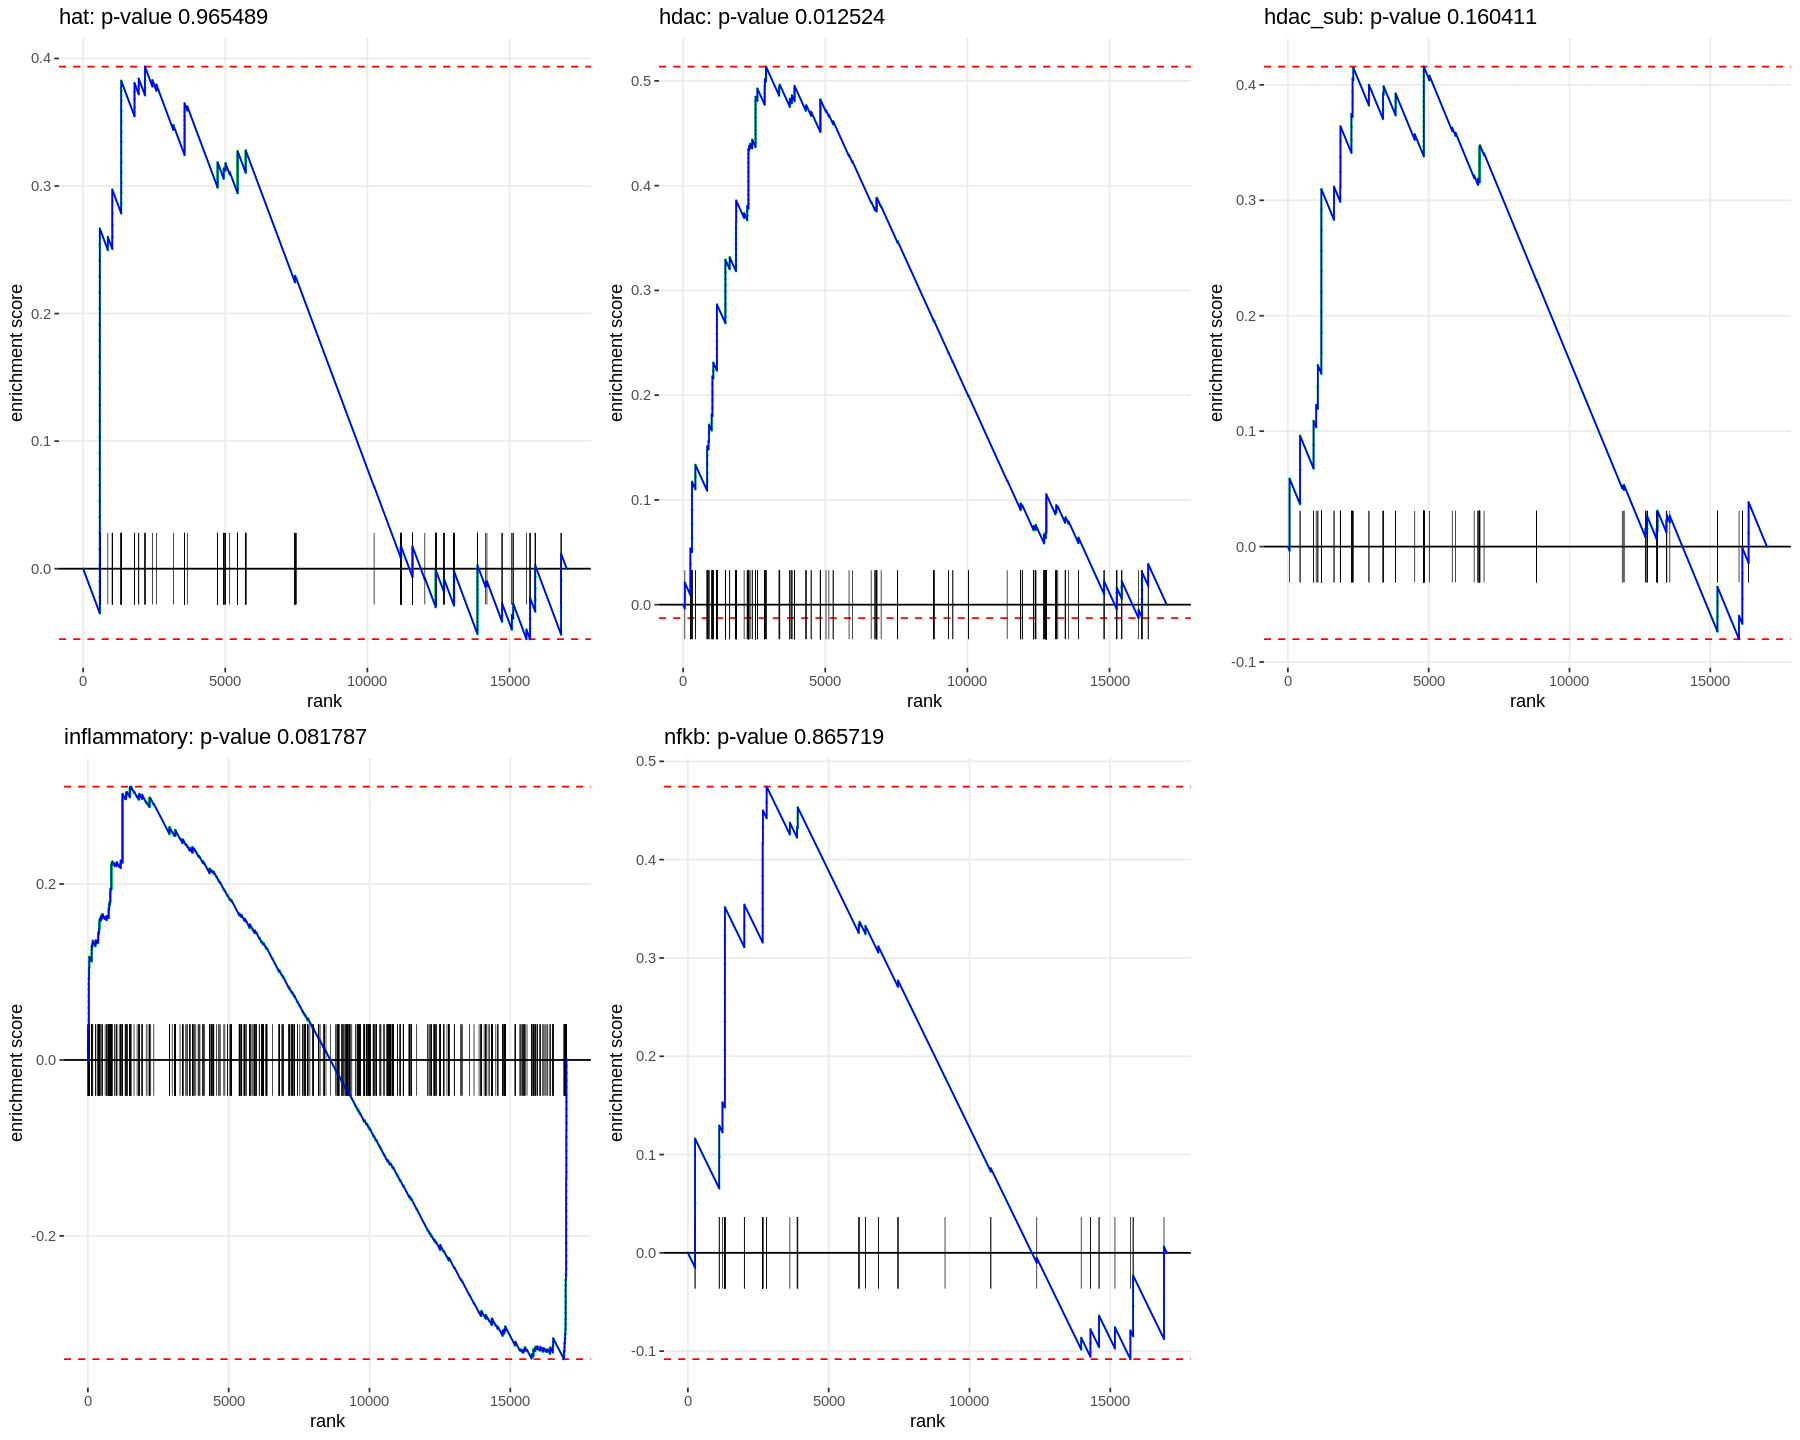

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 12)
plot_grid(ep[['hat']], ep[['hdac']], ep[['hdac_sub']], ep[['inflammatory']], ep[['nfkb']])

Only HDACs are significant between MEF and MEF DOx Day1

In [ ]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Mus.musculus_1.3.1                       
 [2] OrganismDbi_1.34.0                       
 [3] GOfuncR_1.12.0                           
 [4] vioplot_0.3.7                            
 [5] zoo_1.8-9                                
 [6] sm_2.2